In [1]:
import tensorflow as tf
import numpy as np

from keras import applications
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import optimizers
from keras.models import Sequential, Model 
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Input, Lambda
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras import optimizers, callbacks
from keras import regularizers
import math
import sklearn as sk
import pandas as pd
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint

#import cv2

gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))



Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 256, 256 
crop_size = (256, 256)

base_model_path = 'model_best.h5'

train_data_dir ='Apical2_AdditionalDepths_1to7_WithInterleave/Train'
validation_data_dir ='Apical2_AdditionalDepths_1to7_WithInterleave/Validation'
test_data_dir ='Apical2_AdditionalDepths_1to7_WithInterleave/Test'


# number of epochs to train top model
nepochs = 40 

# batch size used by flow_from_directory and predict_generator
batch_size=32


In [3]:
#base_model1 = load_model(base_model_path)
#base_model1.summary()

In [4]:
#base_model = Model(inputs=base_model1.input, outputs=base_model1.get_layer('mixed10').output)
#base_model.summary()

In [5]:
def mean_subtract(img):   
#     img = tf.subtract(img, 35.5161)
    img = tf.subtract(img, 41.89329/255.0)
    return img

Found 11174 images belonging to 7 classes.
Found 4444 images belonging to 7 classes.
7
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 12)                21826796  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                832       
____________________________________

349/349 [==============================] - 5714s 16s/step - loss: 0.3682 - acc: 0.8609 - val_loss: 0.3314 - val_acc: 0.8255

Epoch 00026: val_acc did not improve from 0.91047
Epoch 27/40
349/349 [==============================] - 5521s 16s/step - loss: 0.3245 - acc: 0.8943 - val_loss: 0.2730 - val_acc: 0.9377

Epoch 00027: val_acc improved from 0.91047 to 0.93767, saving model to MyApical2Depth_additionaldepths_only_1to7_withInterleave.h5
Epoch 28/40
349/349 [==============================] - 5356s 15s/step - loss: 0.2721 - acc: 0.9280 - val_loss: 0.2061 - val_acc: 0.9474

Epoch 00028: val_acc improved from 0.93767 to 0.94742, saving model to MyApical2Depth_additionaldepths_only_1to7_withInterleave.h5
Epoch 29/40
349/349 [==============================] - 5310s 15s/step - loss: 0.2361 - acc: 0.9461 - val_loss: 0.1952 - val_acc: 0.9497

Epoch 00029: val_acc improved from 0.94742 to 0.94968, saving model to MyApical2Depth_additionaldepths_only_1to7_withInterleave.h5
Epoch 30/40
349/349 [

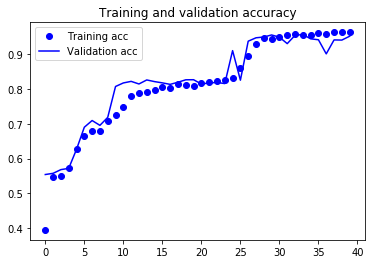

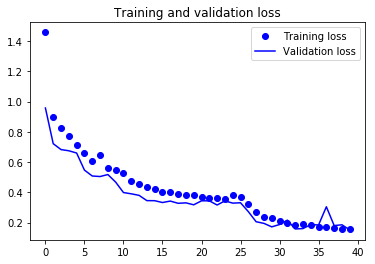

(4412, 7)
[[1.5809317e-04 1.2116321e-05 1.5225849e-07 ... 5.1823361e-03
  9.8547333e-01 8.2065975e-03]
 [1.6295958e-04 1.2283185e-05 1.4938936e-07 ... 6.0418751e-03
  9.8559964e-01 7.1358643e-03]
 [1.6529513e-04 1.2412171e-05 1.4923255e-07 ... 6.3831513e-03
  9.8555422e-01 6.8054586e-03]
 ...
 [1.4999128e-04 1.2053661e-05 1.6322495e-07 ... 3.6961827e-03
  9.8404318e-01 1.1278518e-02]
 [1.5433301e-04 1.2321415e-05 1.6296578e-07 ... 4.2114710e-03
  9.8467559e-01 1.0062055e-02]
 [1.5863430e-04 1.2283615e-05 1.5559102e-07 ... 5.0733262e-03
  9.8536438e-01 8.4271701e-03]]


In [6]:
train_datagen_top = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    height_shift_range=0.05, #0.2, #
    width_shift_range=0.05, #0.2, #
    rotation_range=15, #40, #15,
    shear_range=0.2,
    brightness_range=[0.5,1.5],
    zoom_range=[0.9,1.25],
    rescale=1/255.0)

# train generator
train_generator_top = train_datagen_top.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True)


nb_train_samples = len(train_generator_top.filenames)
num_classes = len(train_generator_top.class_indices)

train_labels = train_generator_top.classes
train_labels = to_categorical(train_labels, num_classes= num_classes)

#validation generator
valid_datagen_top = ImageDataGenerator(rescale=1. / 255)

valid_generator_top = valid_datagen_top.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

nb_validation_samples = len(valid_generator_top.filenames)
validation_labels = valid_generator_top.classes
validation_labels = to_categorical(
    validation_labels, num_classes=num_classes)


print(len(train_generator_top.class_indices))
print(train_labels)
print(validation_labels)

# crop
#train_generator_crops = crop_generator(train_generator_top, crop_size)
#validation_generator_crops = crop_generator(valid_generator_top, crop_size)


#######
base_model = load_model(base_model_path)
#base_model.layers.pop()
#base_model.outputs = [base_model.layers[-1].output]
#base_model.layers[-1].outbound_nodes = []
#base_model.summary()
base_model.built = False 

input_shape = (256,256,1)
model_input = Input(shape = input_shape)
model_input = Lambda(mean_subtract, name='mean_subtraction')(model_input)
base_model.Input = model_input


#########
## dense model
model = Sequential()
model.add(base_model) # add base model
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(64, activation='relu')) # new
#model.add(Dropout(0.5)) #new
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary() 



print("[INFO] compile...")
#model.compile(optimizer='rmsprop',
#            loss='categorical_crossentropy', metrics=['accuracy'])


#sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
mydecay = 0.0005
mymomentum = 0.9
mylr = 0.01 #0.009 #0.01 #0.03 #0.001 #0.1 #0.01
sgd = optimizers.SGD(lr=mylr, decay=mydecay, momentum=mymomentum)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

print("[INFO] model fit...")
#history = model.fit_generator(train_generator_crops,
#                    steps_per_epoch= nb_train_samples//batch_size, #100, #50,  #1000,
#                    epochs= nepochs,
#                    validation_data= validation_generator_crops,
#                    validation_steps= nb_validation_samples//batch_size, #50, #8, #50, # 800,
#                    verbose=1)

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('MyApical2Depth_additionaldepths_only_1to7_withInterleave.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(
    train_generator_top,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=nepochs,
    validation_data= valid_generator_top,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=callbacks_list,
    verbose=1)

#history = model.fit_generator(train_generator_top,
#                steps_per_epoch= nb_train_samples//batch_size, #100, #50,  #1000,
#                epochs= nepochs,
#                validation_data= valid_generator_top,
#                validation_steps= nb_validation_samples//batch_size, #50, #8, #50, # 800,
#                verbose=1)
#

#base_model.save_weights(top_model_weights_path)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
y_classes = predictions.argmax(axis=-1)
print(predictions.shape)
print (predictions)

    

In [7]:
import pandas as pd
model.evaluate_generator(generator=valid_generator_top, steps = nb_validation_samples // batch_size)


# create test generator with valid directory ( due to lack of data)
valid_generator = valid_datagen_top.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 

valid_generator.reset()
pred=model.predict_generator(valid_generator,steps = len(valid_generator), verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

print(len(predictions))

filenames=valid_generator.filenames
#print(filenames.shape)
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_validation.csv",index=False)

Found 4444 images belonging to 7 classes.
4444/4444 [==============================] - 507s 114ms/step
4444


In [8]:
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
valid_generator.reset()
predCM=model.predict_generator(valid_generator,steps = len(valid_generator),verbose=1)
y_pred = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4', 'Depth5','Depth6','Depth7' ]
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Confusion MatrixPredict...
4444/4444 [==============================] - 508s 114ms/step
Confusion Matrix
[[613  37   0   0   0   0   0]
 [ 12 632   6   0   0   0   0]
 [  0   8 556  82   0   0   0]
 [  0   2  43 605   0   0   0]
 [  0   0   0   5 607   4   0]
 [  0   0   0   0   4 607   5]
 [  0   0   0   1   0   3 612]]
Classification Report
              precision    recall  f1-score   support

      Depth1       0.98      0.94      0.96       650
      Depth2       0.93      0.97      0.95       650
      Depth3       0.92      0.86      0.89       646
      Depth4       0.87      0.93      0.90       650
      Depth5       0.99      0.99      0.99       616
      Depth6       0.99      0.99      0.99       616
      Depth7       0.99      0.99      0.99       616

   micro avg       0.95      0.95      0.95      4444
   macro avg       0.95      0.95      0.95      4444
weighted avg       0.95      0.95      0.95      4444



In [9]:
import pandas as pd

test_data_dir ='Apical2_AdditionalDepths_1to7_WithInterleave/Test'

test_datagen_top = ImageDataGenerator(rescale=1. / 255)

test_generator_top = test_datagen_top.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

nb_test_samples = len(test_generator_top.filenames)

test_loss, test_acc = model.evaluate_generator(generator=test_generator_top, steps = nb_test_samples//batch_size)

print('test acc:', test_acc)

# create test generator with actual test data
test_generator = test_datagen_top.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 



test_generator.reset()
pred=model.predict_generator(test_generator, steps = len(test_generator), verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_forTestdata.csv",index=False)

Found 3314 images belonging to 7 classes.
test acc: 0.9581310679611651
Found 3314 images belonging to 7 classes.
3314/3314 [==============================] - 377s 114ms/step


In [10]:
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
test_generator.reset()
predCM=model.predict_generator(test_generator,steps = len(test_generator), verbose=1)
y_pred = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4', 'Depth5','Depth6','Depth7']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))



Confusion MatrixPredict...
3314/3314 [==============================] - 385s 116ms/step
Confusion Matrix
[[461  28   3   0   0   0   0]
 [ 13 465   2   0   0   0   0]
 [  0   8 363  61   0   0   0]
 [  0   0  19 451   0   0   0]
 [  0   0   0   0 479   1   0]
 [  0   0   0   0   0 477   3]
 [  0   0   0   0   0   0 480]]
Classification Report
              precision    recall  f1-score   support

      Depth1       0.97      0.94      0.95       492
      Depth2       0.93      0.97      0.95       480
      Depth3       0.94      0.84      0.89       432
      Depth4       0.88      0.96      0.92       470
      Depth5       1.00      1.00      1.00       480
      Depth6       1.00      0.99      1.00       480
      Depth7       0.99      1.00      1.00       480

   micro avg       0.96      0.96      0.96      3314
   macro avg       0.96      0.96      0.96      3314
weighted avg       0.96      0.96      0.96      3314

